In [32]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import tensorly.kruskal_tensor as tl_kruskal
import tensorly.random as tl_rand
import numpy as np
import time

from cpd_mwu import CPD_MWU

In [33]:
# Set up
lamb = 0.001
eps = 0.05 # 1/N where N = # interations
shape = (300,300,300)
nu = 2
rank = 5  
num_iterations = 400

In [37]:
# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 401)

# Generate random latent factors
F = np.array(tl_rand.random_kruskal(shape=shape, rank=rank, full=False, random_state=np.random.RandomState(seed=0)))
X = tl_kruskal.kruskal_to_tensor(F)

start = time.time()
A,B,C, error = CPD_MWU(X, F, sketching_rates, lamb, eps, nu, rank, True, num_iterations)
end = time.time()
sketch_with_weight_update_error += error
    
# Print out total time
print("Total time for 1 iterations:", end-start)


updated
Total time for 1 iterations: 351.8287847042084


0.6859835219756316


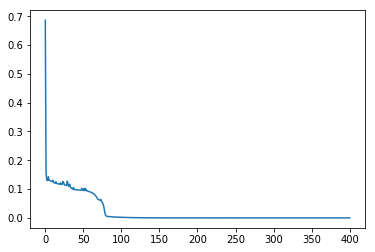

In [36]:
print(sketch_with_weight_update_error[0])
x = range(num_iterations+1)
plt.plot(x, error)

In [89]:
# Run experiment for no sketching
no_sketch_error = np.array([0.0] * 101)
sketching_rates = [1]
start = time.time()

for i in range(5):
    X = tl_rand.random_kruskal((366,366,100), 5, full=True)
    A,B,C, error = CPD_MWU(X, sketching_rates, lamb, eps, nu, rank, True, num_iterations)
    no_sketch_error += error

# Print out total time
print("Total time for 5 iterations:", time.time()-start)

# Average out error
no_sketch_error /= 5

Total time for 5 iterations: 382.2845125198364


In [90]:
# Run experiment for sketching without weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_no_weight_update_error = np.array([0.0] * 101)
start = time.time()

for i in range(5):
    X = tl_rand.random_kruskal((366,366,100), 5, full=True)
    A,B,C, error = CPD_MWU(X, sketching_rates, lamb, eps, nu, rank, False, num_iterations)
    sketch_no_weight_update_error += error

# Print out total time
print("Total time for 5 iterations:", time.time()-start)

# Average out error
sketch_no_weight_update_error /= 5

Total time for 5 iterations: 183.54183912277222


In [91]:
# Run experiment for sketching with weight update
sketching_rates = list(np.linspace(10**(-3), 10**(-1), 4)) + [1]
sketch_with_weight_update_error = np.array([0.0] * 101)
start = time.time()

for i in range(5):
    X = tl_rand.random_kruskal((366,366,100), 5, full=True)
    A,B,C, error = CPD_MWU(X, sketching_rates, lamb, eps, nu, rank, True, num_iterations)
    sketch_with_weight_update_error += error
    
# Print out total time
print("Total time for 5 iterations:", time.time()-start)

# Average out error
sketch_with_weight_update_error /= 5

Total time for 5 iterations: 223.0164532661438


<Figure size 432x288 with 0 Axes>

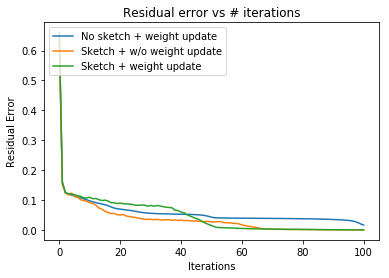

<Figure size 432x288 with 0 Axes>

In [93]:
# Plot out error
x = [i for i in range(len(error))]
plt.title('Residual error vs # iterations')
plt.xlabel('Iterations')
plt.ylabel('Residual Error')
plt.plot(x, no_sketch_error, label='No sketch + weight update')
plt.plot(x, sketch_no_weight_update_error, label='Sketch + w/o weight update')
plt.plot(x, sketch_with_weight_update_error, label='Sketch + weight update')
plt.legend(loc="upper left")
plt.figure()